# Recurrent Neural Network

### Part 1 - Data Preprocessing

**Importing the libraries**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the training set**

In [34]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values
training_set
#training_set.shape -> (1258, 1)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feature Scaling**

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

**Getting the inputs and the outputs**

In [36]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

**Reshaping**

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1257, 1, 1)

### Part 2 - Building the RNN
**Importing the Keras libraries and packages**

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [39]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting the CNN to the images**

In [40]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1257/1257 [==============================] - 0s 327us/step - loss: 0.0994
Epoch 2/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0811
Epoch 3/200
1257/1257 [==============================] - 0s 30us/step - loss: 0.0751
Epoch 4/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0731
Epoch 5/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0715
Epoch 6/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.0700
Epoch 7/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0683
Epoch 8/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0667
Epoch 9/200
1257/1257 [==============================] - 0s 31us/step - loss: 0.0649
Epoch 10/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0632
Epoch 11/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0613
Epoch 12/200
1257/1257 [==============================] - 0s 3

1257/1257 [==============================] - 0s 32us/step - loss: 2.5121e-04
Epoch 95/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5111e-04
Epoch 96/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5120e-04
Epoch 97/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.5065e-04
Epoch 98/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.5086e-04
Epoch 99/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.5060e-04
Epoch 100/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5136e-04
Epoch 101/200
1257/1257 [==============================] - 0s 30us/step - loss: 2.5073e-04
Epoch 102/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.5146e-04
Epoch 103/200
1257/1257 [==============================] - 0s 34us/step - loss: 2.4985e-04
Epoch 104/200
1257/1257 [==============================] - 0s 38us/step - loss: 2.5150e-04
Epoch 105/200
1257

1257/1257 [==============================] - 0s 43us/step - loss: 2.4836e-04
Epoch 185/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4767e-04
Epoch 186/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4813e-04
Epoch 187/200
1257/1257 [==============================] - 0s 30us/step - loss: 2.5096e-04
Epoch 188/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.4822e-04
Epoch 189/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.5211e-04
Epoch 190/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.4734e-04
Epoch 191/200
1257/1257 [==============================] - 0s 30us/step - loss: 2.5175e-04
Epoch 192/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.4726e-04
Epoch 193/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4878e-04
Epoch 194/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5028e-04
Epoch 195/200

### Part 3 - Making the predictions and visualising the results

**Getting the real stock price of 2017**

In [41]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

**Getting the predicted stock price of 2017**

In [42]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

**Visualising the results**

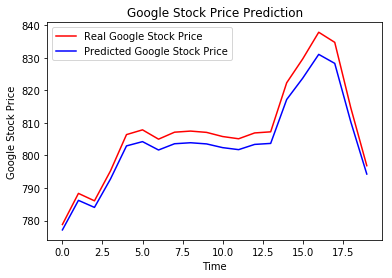

In [43]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()